## DateTime Index, Time Resampling/Shifting/Rolling and Expanding

In [1]:
# 필요한 library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### DateTime Index

In [2]:
# 연, 월, 일 지정
today = datetime(2019, 1, 24)
today

datetime.datetime(2019, 1, 24, 0, 0)

In [3]:
# 연, 월, 일, 시, 분 지정
datetime(2019, 1, 24, 13, 39)

datetime.datetime(2019, 1, 24, 13, 39)

In [4]:
# today의 연, 월, 일 확인
today.year, today.month, today.day

(2019, 1, 24)

In [5]:
# DatetimeIndex 생성
dates = [datetime(2019, 1, 23), datetime(2019, 1, 24)]
dt_index = pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2019-01-23', '2019-01-24'], dtype='datetime64[ns]', freq=None)

In [6]:
# DatetimeIndex를 index로 하는 dataframe 생성
data = np.random.randn(2, 2)
cols = ['A', 'B']
df = pd.DataFrame(data = data, index = dt_index, columns = cols)
df

,A,B
2019-01-23,-0.073659,-0.458412
2019-01-24,0.489850,0.147290


In [7]:
# index의 최대값, 최소값, 최대값위치, 최소값위치 확인
df.index.max(), df.index.min(), df.index.argmax(), df.index.argmin()

(Timestamp('2019-01-24 00:00:00'), Timestamp('2019-01-23 00:00:00'), 1, 0)

### Resampling

In [8]:
# 필요한 csv 파일 불러오기
df = pd.read_csv('apple_stock.csv')

In [9]:
# Date column의 형식이 object인 것 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null object
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


In [10]:
# Date column의 형식을 datetime으로 변경
df['Date'] = df['Date'].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null datetime64[ns]
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 123.9 KB


In [11]:
# Date column을 index로 지정
df.set_index('Date', inplace = True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [12]:
# Datetime Index의 month를 column으로 추가
df['month'] = df.index.month
df.head()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,1
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,1


In [13]:
# Month column을 기준으로 합치기
df.groupby('month').agg(sum)

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [14]:
# Datetime Index의 year을 기준으로 합치기
df.groupby(df.index.year).sum()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12
2010,9445.277117,9246.514246,9358.474289,9354.328560,3.775623e+10,6264.245874,1659
2011,13227.248539,12970.717155,13106.211399,13104.155712,3.101483e+10,8775.365667,1650
2012,20779.478600,20354.327164,20594.740028,20573.204269,3.299105e+10,14019.096821,1625
2013,17195.001381,16856.895695,17032.612881,17014.855690,2.560539e+10,13377.068882,1649
2014,23439.191429,23051.835686,23239.397186,23250.692886,1.591449e+10,21242.415085,1651
2015,30553.620010,29953.500031,30284.289993,30250.079948,1.306315e+10,28458.719048,1655
2016,26567.650009,26129.949989,26335.959984,26360.209991,9.680622e+09,25313.373260,1652
2017,38002.920044,37521.400078,37761.670013,37788.319946,6.810426e+09,36972.054916,1640


In [15]:
# Datetime Index의 year, month를 기준으로 합치기
df.groupby([df.index.year, df.index.month]).agg(sum).head(10)

High         Low        Open       Close        Volume  \
Date Date                                                                 
2009 12     30.478571   30.080000   30.447144   30.104286  8.810270e+07   
2010 1     573.331425  557.244289  568.397141  563.798571  3.792249e+09   
     2     544.092857  532.875715  537.678570  539.588568  2.694020e+09   
     3     738.235716  727.080000  732.047146  734.064285  3.038543e+09   
     4     759.410004  744.359997  753.004292  753.445721  3.091782e+09   
     5     730.337135  699.494276  719.941429  718.461422  4.520664e+09   
     6     832.535709  812.074276  824.641434  820.742855  4.162813e+09   
     7     775.377140  753.262863  766.438568  764.849998  3.917426e+09   
     8     797.491417  783.245712  790.775719  789.872864  2.397280e+09   
     9     827.359993  811.739990  818.522850  821.552849  2.962480e+09   

            Adj Close  month  
Date Date                     
2009 12     20.159719     12  
2010 1     377.554930     19  
     2     361.342400     38  
     3     491.575537     69  
     4     504.554579     84  
     5     481.126873    100  
     6     549.620947    132  
     7     512.191607    147  
     8     528.948475    176  
     9     550.163418    189

In [16]:
# Time Series Offset Aliases(https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
# 2009년 연평균 값 확인
df.resample(rule = 'A').mean()['2009']

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.08,30.447144,30.104286,88102700.0,20.159719,12.0


In [17]:
# 연도별 첫날 값 확인
def first_day(sample):
    return sample[0]

df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


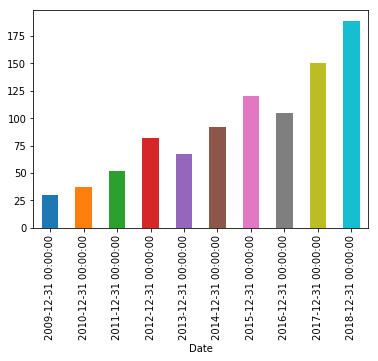

In [18]:
# 연도별 Close column의 평균 막대 그래프 그리기
df['Close'].resample('A').mean().plot(kind = 'bar')

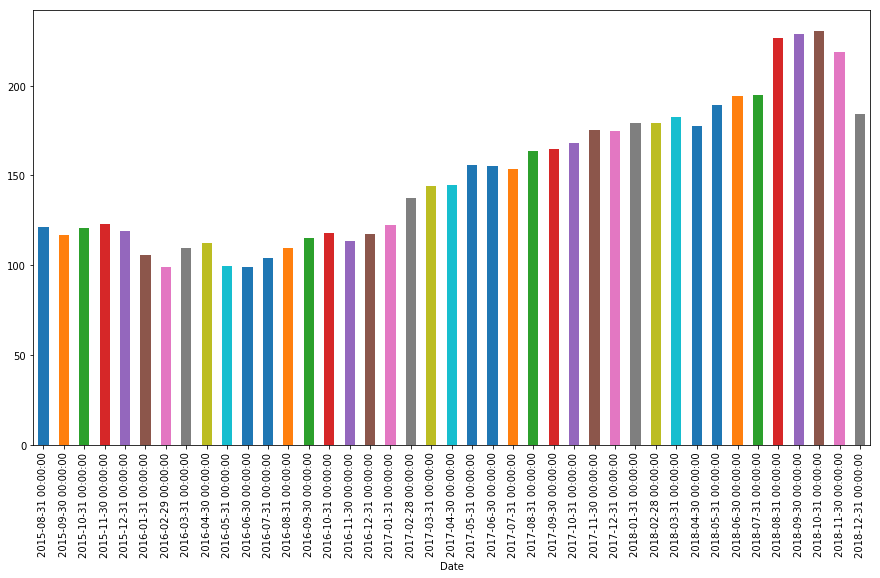

In [19]:
# 2015년 8월 이후 월별 Open column의 최대값 막대 그래프 그리기
df['Open']['2015-8':].resample('M').max().plot(kind = 'bar', figsize = (15, 8))

In [20]:
# 주말은 포함되지 않은 datetime index 생성(Business date)
daily_daterange = pd.date_range(start = datetime(2018,9,1),
                      end = datetime(2019, 1, 24),
                      freq = 'B')

In [21]:
# daily_daterange를 index로 하는 dataframe 생성
daily_dataset = pd.DataFrame(
                    data = {'value': np.random.rand(len(daily_daterange))},
                    index = daily_daterange)
daily_dataset.head(10)

,value
2018-09-03,0.879162
2018-09-04,0.735803
2018-09-05,0.754711
2018-09-06,0.893365
2018-09-07,0.853868
2018-09-10,0.939840
2018-09-11,0.268490
2018-09-12,0.020385
2018-09-13,0.025751
2018-09-14,0.243846


In [22]:
# 월요일을 기준으로 각 주의 최소값 확인 
daily_dataset.resample('W-Mon').min()

,value
2018-09-03,0.879162
2018-09-10,0.735803
2018-09-17,0.020385
2018-09-24,0.388376
2018-10-01,0.001876
2018-10-08,0.088098
2018-10-15,0.566277
2018-10-22,0.414340
2018-10-29,0.318116
2018-11-05,0.080451


In [23]:
# 월별 최소값 확인
daily_dataset.resample('M').min()

,value
2018-09-30,0.001876
2018-10-31,0.088098
2018-11-30,0.080451
2018-12-31,0.015784
2019-01-31,0.010045


### Shifting

In [24]:
# 필요한 csv 파일 불러오기(Date index가 object 형식)
df = pd.read_csv('apple_stock.csv', index_col = 'Date')
df.index

Index(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=2265)

In [25]:
# Date index를 Datetime Index로 변경
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [26]:
# df 확인
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [27]:
# 한 행씩 뒤로 shift(첫 행이 NaN)
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [28]:
# 한 행씩 뒤로 shift(원본의 마지막 행이 사라짐)
df.shift(1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,158.160004,149.630005,156.860001,150.729996,95744600.0,150.729996
2018-12-26,151.550003,146.589996,148.149994,146.830002,37169200.0,146.830002
2018-12-27,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-28,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-31,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996


In [29]:
# 한 행씩 앞으로 shift(원본의 첫 행이 사라짐)
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-04,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-05,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-06,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-07,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305


In [30]:
# 한 행씩 앞으로 shift(원본의 마지막 행이 사라짐)
df.shift(-1).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# 한 달씩 뒤로 shift
df.tshift(freq = 'M', periods = 1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


### Rolling & Expanding

In [32]:
# Date column을 Datetime Index로 하여 csv 파일 불러오기1
df = pd.read_csv('apple_stock.csv', index_col = 'Date', parse_dates = True)
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [33]:
# Date column을 Datetime Index로 하여 csv 파일 불러오기2
df = pd.read_csv('apple_stock.csv', index_col = 'Date', parse_dates = ['Date'])
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [34]:
# 연-월-일로 나누는 parser 함수 정의
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, "%Y-%m-%d")

dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [35]:
# Date column을 Datetime Index로 하여 csv 파일 불러오기3
df = pd.read_csv('apple_stock.csv',
                 index_col = 'Date',
                 parse_dates = ['Date'],
                 date_parser = dateparser)
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [36]:
# 7일 이동 평균 확인
df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


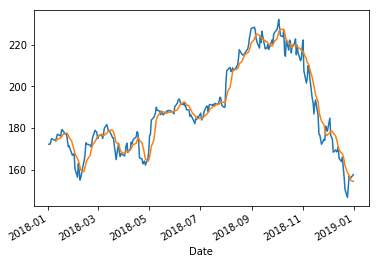

In [37]:
# 2018년 이후 Close column의 원본과 7일 이동 평균 그래프 그리기
df['2018':]['Close'].plot()
df['2018':].rolling(window = 7).mean()['Close'].plot()

In [38]:
# 30일 이동 평균을 Close: 30 Day Mean column으로 추가
df['Close: 30 Day Mean'] = df['Close'].rolling(30).mean()

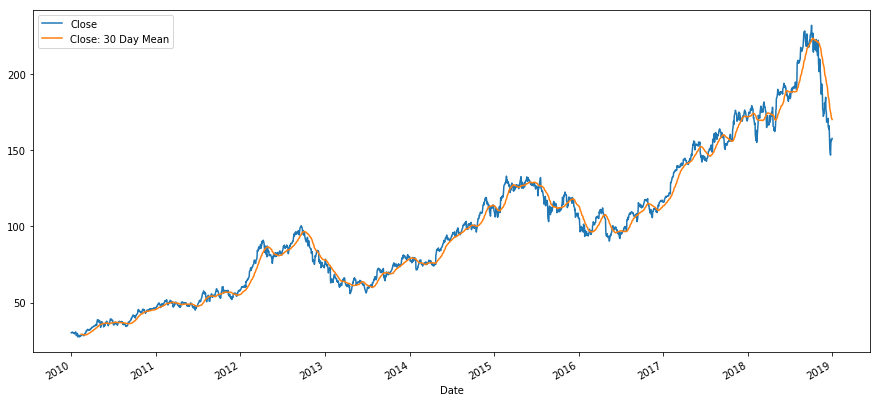

In [39]:
# Close column의 원본과 30일 이동 평균 그래프 그리기
df[['Close', 'Close: 30 Day Mean']].plot(figsize = (15, 7))

In [40]:
# 누적 평균 확인
df.expanding(min_periods = 1).mean().head()

,High,Low,Open,Close,Volume,Adj Close,Close: 30 Day Mean
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,NaN
2010-01-04,30.560714,30.210000,30.468572,30.338572,1.057676e+08,20.316611,NaN
2010-01-05,30.639999,30.294762,30.531429,30.434285,1.206704e+08,20.380708,NaN
2010-01-06,30.666785,30.247857,30.555000,30.360357,1.250128e+08,20.331201,NaN
2010-01-07,30.590571,30.171143,30.494000,30.304857,1.238668e+08,20.294035,NaN


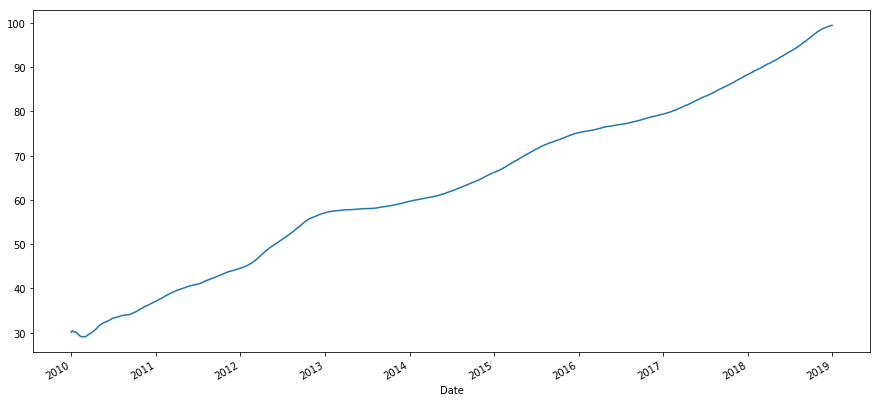

In [41]:
# 누적 평균 그래프 그리기
df['Close'].expanding(min_periods = 1).mean().plot(figsize = (15, 7))

### Bollinger Bands(볼린저밴드)

In [42]:
# Close column의 20일 이동평균, 20일 이동평균에 20일 이동평균의 표준편차*2를 더하거나 뺀 Column 생성
df['Close: 20Day Mean'] = df['Close'].rolling(window = 20).mean()
df['Upper'] = df['Close: 20Day Mean'] + 2 * df['Close'].rolling(20).std()
df['Lower'] = df['Close: 20Day Mean'] - 2 * df['Close'].rolling(20).std()

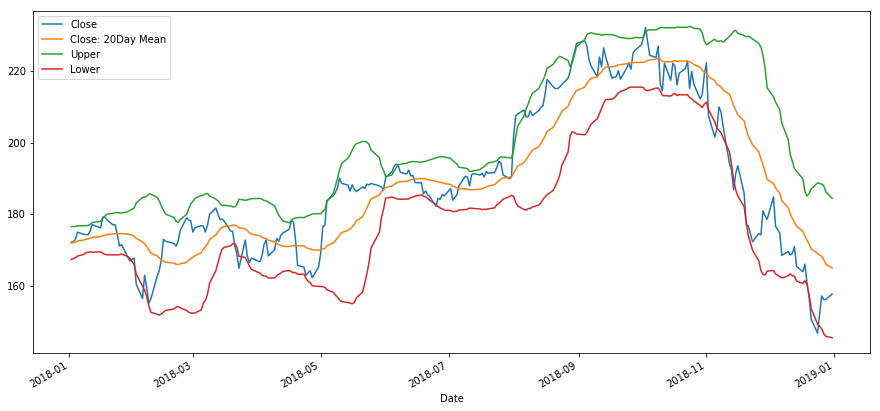

In [43]:
# Close column의 볼랜저밴드 그리기
df['2018':][['Close', 'Close: 20Day Mean', 'Upper', 'Lower']].plot(figsize = (15, 7))